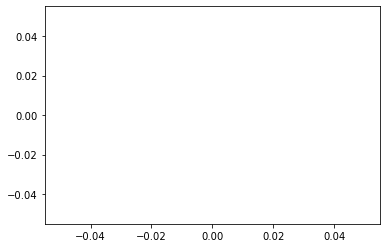

In [1]:
%matplotlib inline
# force plt on windows 10
import matplotlib.pyplot as plt
plt.plot()

import sys
sys.path.append("..")

import aggets.ds.window as window
import aggets.ds.hyper_f_load as hfl
import aggets.ds.window as window

In [2]:
data = hfl.load()

In [14]:
CONV_WIDTH = 3
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)

conv_window = window.WindowGenerator(
    train_df = data['train'],
    val_df = data['val'],
    test_df = data['test'],
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['att4']
)
conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['att4']

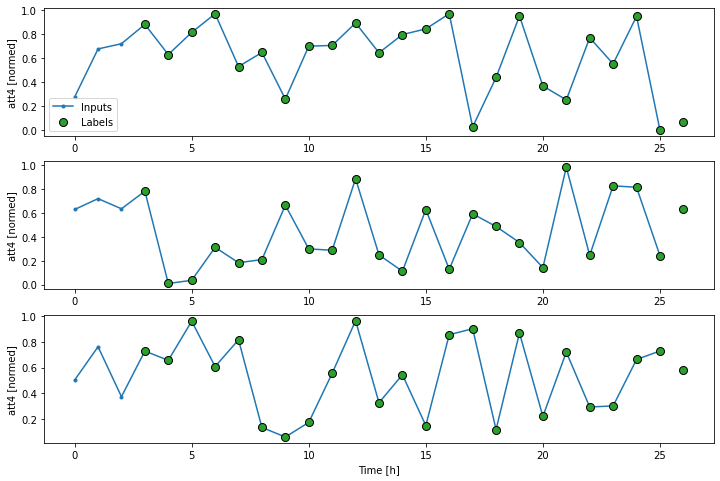

In [15]:
conv_window.plot(plot_col='att4')

In [16]:
print('X(batch, sequence, features) =', next(conv_window.train)[0].shape)
print('y(batch, sequence, features) =', next(conv_window.train)[1].shape)

X(batch, sequence, features) = torch.Size([32, 26, 11])
y(batch, sequence, features) = torch.Size([32, 24, 1])


In [ ]:
import aggets.train as train
import aggets.model.simple as simple

model = simple.conv_1d(CONV_WIDTH, 11, 64)
train.train_window_model(model, conv_window, max_epochs=2)

epoch 0 batch 1000 loss=0.0915, MTL=0.0857, MVL=nan				
epoch 0 batch 2000 loss=0.0848, MTL=0.0846, MVL=nan				
epoch 0 batch 3000 loss=0.084, MTL=0.0842, MVL=nan				
epoch 0 batch 4000 loss=0.084, MTL=0.084, MVL=nan				
epoch 0 batch 5000 loss=0.083, MTL=0.0839, MVL=nan				
epoch 0 batch 6000 loss=0.0819, MTL=0.0838, MVL=nan				
epoch 0 batch 7000 loss=0.085, MTL=0.0838, MVL=nan				
epoch 0 batch 8000 loss=0.082, MTL=0.0837, MVL=nan				
epoch 0 batch 9000 loss=0.0811, MTL=0.0837, MVL=nan				
epoch 0 batch 10000 loss=0.0846, MTL=0.0837, MVL=nan				
epoch 0 batch 11000 loss=0.0857, MTL=0.0836, MVL=nan				
epoch 0 batch 12000 loss=0.0814, MTL=0.0836, MVL=nan				
epoch 0 batch 13000 loss=0.0853, MTL=0.0836, MVL=nan				
epoch 0 batch 14000 loss=0.0849, MTL=0.0836, MVL=nan				
epoch 0 batch 15000 loss=0.0816, MTL=0.0836, MVL=nan				
epoch 0 batch 16000 loss=0.0827, MTL=0.0835, MVL=nan				
epoch 0 batch 17000 loss=0.0865, MTL=0.0835, MVL=nan				
epoch 0 batch 18000 loss=0.0783, MTL=0.0835, M

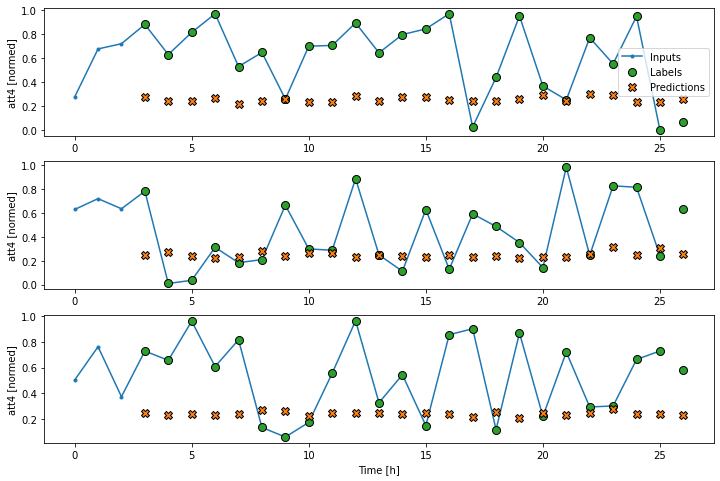

In [22]:
conv_window.plot(model, plot_col='att4')